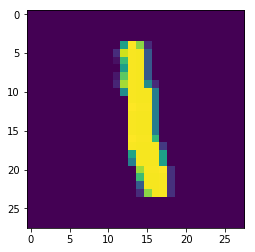

In [15]:
import tensorflow as tf
import keras
import pickle
import gzip
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.layers.normalization import BatchNormalization
import cv2

#load dataset
with gzip.open('mnist.pkl.gz', 'rb') as data:
    (train_x, train_y), (valid_x, valid_y), (test_x, test_y) = pickle.load(data, encoding='latin1')
train_x = train_x.reshape(train_x.shape[0], 28, 28, 1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, 1)
plt.imshow(train_x[6].reshape(28, 28))
cv2.imwrite('sample.png', cv2.bitwise_not(train_x[6].reshape(28, 28)))
train_x = tf.keras.utils.normalize(train_x, axis=0)
test_x = tf.keras.utils.normalize(test_x, axis=0)
img_w = 28; img_h = 28

In [55]:
#model begin

model = Sequential()

model.add(Conv2D(16, (5, 5), activation='relu', input_shape=(img_w, img_h, 1)))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
model.add(Dense(1000, activation='relu'))

model.add(Dense(10, activation='softmax'))

#model end

model.summary()
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 24, 24, 16)        416       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 10, 10, 32)        4640      
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 800)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 1000)              801000    
_________________________________________________________________
dense_38 (Dense)             (None, 10)                10010     
Total para

In [56]:
#compile
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
model.fit(train_x, train_y, epochs=3)

Epoch 1/3
50000/50000 [==============================] - 31s 618us/step - loss: 0.3688 - acc: 0.8839
Epoch 2/3
50000/50000 [==============================] - 31s 613us/step - loss: 0.0951 - acc: 0.9704
Epoch 3/3
50000/50000 [==============================] - 31s 615us/step - loss: 0.0615 - acc: 0.9806


In [57]:
model.save_weights('model.h5')